In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
%matplotlib inline

### a) Cultivar
### b) Alcohol
### c) Malic acid
### d) Ash
### e) Alcalinity of ash
### f) Magnesium
### g) Total phenols
### h) Flavanoids
### i) Nonflavanoid phenols
### j) Proanthocyanins
### k) Color intensity
### l) Hue
### m) OD280/OD315 of diluted wines
### n) Proline

In [3]:
df = pd.read_csv('wine.data', header=0, sep=',')
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
labels = df[['a']]

In [5]:
df.isna().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
dtype: int64

#### Ici on voit qu'il n'y a pas de valeurs manquantes, donc pas besoin de preparer les données

In [6]:
#remove class
data = df[["b","c","d","e","f","g","h","i","j","k","l","m","n"]]

In [7]:
n= data.shape[0]
print(n)
d= data.shape[1]
print(d)

178
13


### Normalisation des données

In [8]:
# Import the library
from sklearn.preprocessing import StandardScaler

# Use StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

## ACP

### ACP visualisation
Visualisez les données dans un espace bidimensionnel avec un seul nuage de points.

#### Apply ACP on the dataset

In [36]:
# Import the library
from sklearn.decomposition import PCA

# Use PCA
pca = PCA(n_components=d)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

## Projeter les données dans le 1er plan factoriel (1er et 2nd axes factoriels) avec les classes

Visualisation des clusters sur le plan obtenu par l'ACP

Text(0, 0.5, '2ème Principal Component')

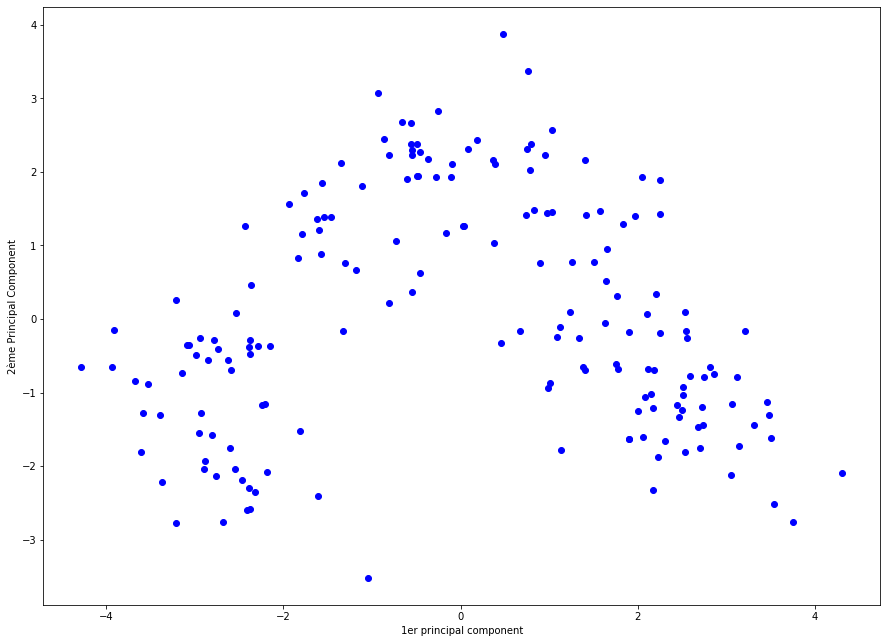

In [32]:
plt.figure(figsize=(15,11))
plt.scatter(x_pca[:,0],x_pca[:,1], c = 'b', cmap='plasma')
plt.xlabel('1er principal component')
plt.ylabel('2ème Principal Component')

In [11]:
label = df["a"]
print(label)
label[label==1]='red'
label[label==2]='blue'
label[label==3]='green'

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: a, Length: 178, dtype: int64


C:\Users\Dieu\AppData\Local\Temp/ipykernel_6488/2474958576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label==1]='red'
C:\Users\Dieu\AppData\Local\Temp/ipykernel_6488/2474958576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label==2]='blue'
C:\Users\Dieu\AppData\Local\Temp/ipykernel_6488/2474958576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label==3]='green'


In [12]:
x_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

Text(0, 0.5, '2ème Principal Component')

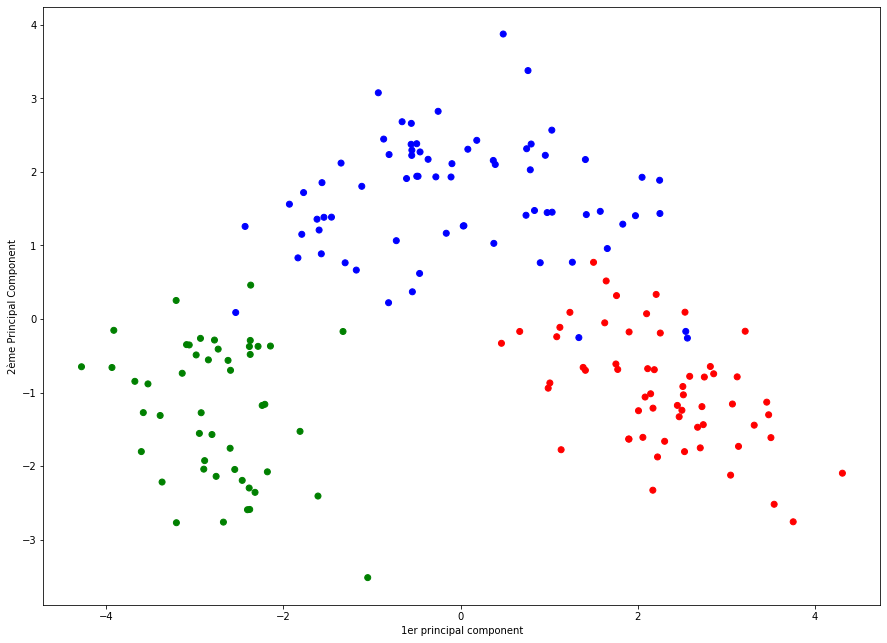

In [34]:
plt.figure(figsize=(15,11))
plt.scatter(x_pca[:,0],x_pca[:,1], c = label, cmap='plasma')
plt.xlabel('1er principal component')
plt.ylabel('2ème Principal Component')

<u> Conclusion : </u> Ici, on voit bien qu'on a réussi à séparer les trois classes, la première classe en rouge, la deuxième en bleu et la troisième en vert, en utilisant seulement le premier plan factorielle.

### Interprétation des composants

#### Give the 2 first components coordinates

In [14]:
pca.components_[:,0]

array([ 0.1443294 , -0.48365155, -0.20738262, -0.0178563 , -0.26566365,
       -0.21353865, -0.05639636, -0.39613926,  0.50861912,  0.21160473,
       -0.22591696, -0.26628645,  0.01496997])

In [15]:
pca.components_[:,1]

array([-0.24518758, -0.22493093,  0.08901289,  0.53689028,  0.03521363,
       -0.53681385,  0.42052391, -0.06582674, -0.07528304, -0.30907994,
        0.07648554,  0.12169604,  0.02596375])

#### Plot the explained variance of each component


In [16]:
# Explained variance
print(pca.explained_variance_)

# Corrected variance values
n = x_pca.shape[0]
corrected_variance = ((n-1)/n)*pca.explained_variance_
print(corrected_variance)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]


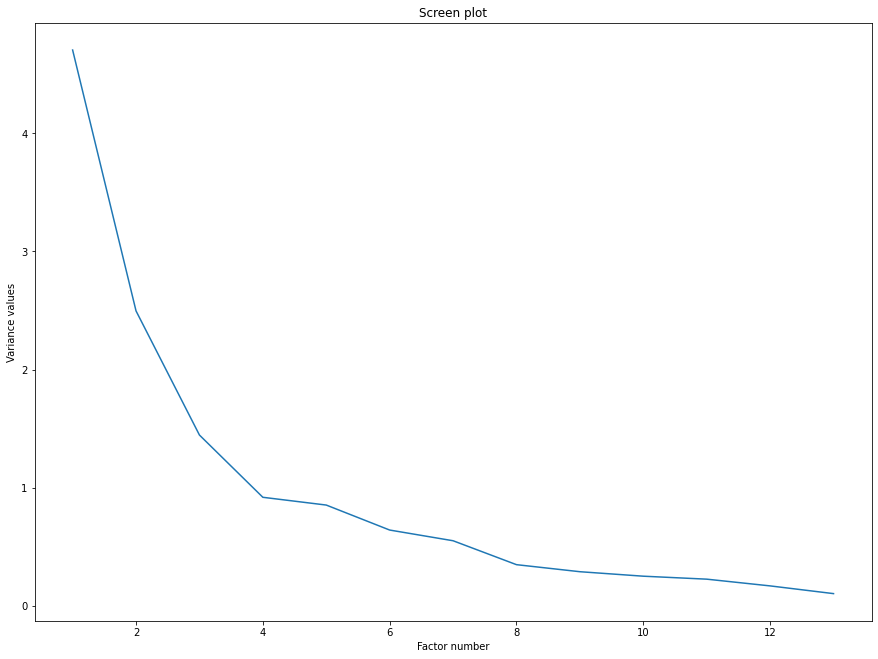

In [40]:
#Plot
plt.figure(figsize=(15,11))
p = x_pca.shape[1]
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Screen plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

#### Plot the explained cumulative variance of each component in percentage

In [18]:
pca.explained_variance_ratio_*100

array([36.1988481 , 19.20749026, 11.12363054,  7.06903018,  6.56329368,
        4.93582332,  4.23867932,  2.68074895,  2.2221534 ,  1.93001909,
        1.73683569,  1.29823258,  0.79521489])

In [19]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

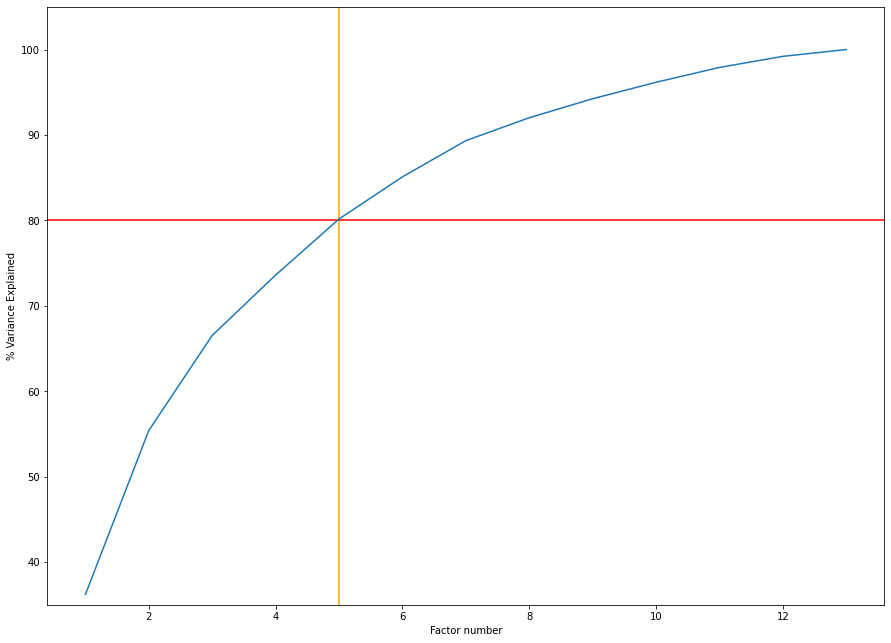

In [41]:
# plot the explained variance of each component
plt.figure(figsize=(15,11))
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')
plt.axvline(x=5,color='orange')
plt.axhline(y=80, color='red', linestyle='-')
plt.ylim(35,105)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

<AxesSubplot:>

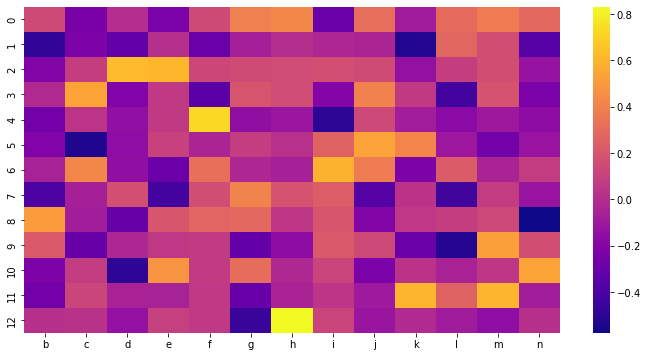

In [21]:
df_comp = pd.DataFrame(pca.components_,columns=data.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

### Variable representation

#### Compute the correlation between the principal components and the variables

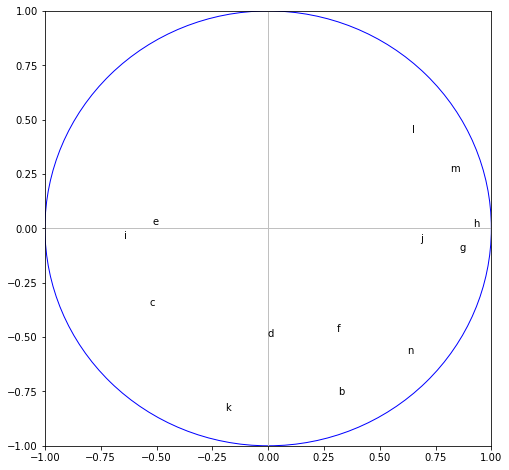

<Figure size 1800x1296 with 0 Axes>

In [43]:
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Compute the correlation circle between the two first principal components and the variables

# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Print the labels (variable names)
for j in range(p):
     plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

# Print the correlation circle
plt.show()

## Clustering suite

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

For n_clusters = 2 The average silhouette_score is : 0.2593169555318254
For n_clusters = 3 The average silhouette_score is : 0.28485891918989864
For n_clusters = 4 The average silhouette_score is : 0.25558188192125253
For n_clusters = 5 The average silhouette_score is : 0.2001844376105971


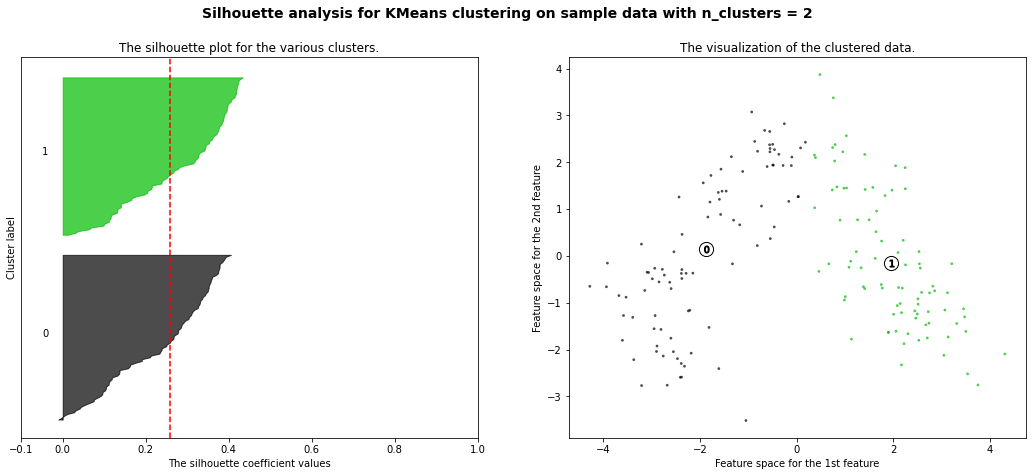

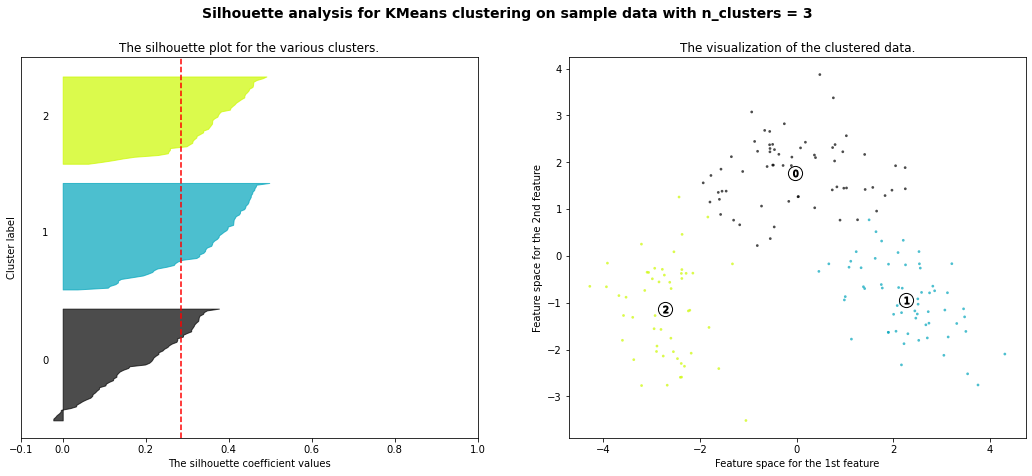

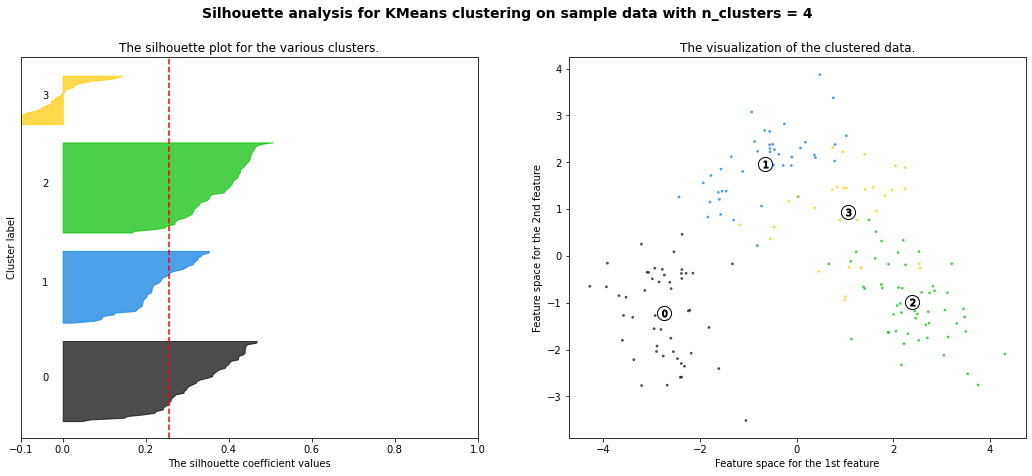

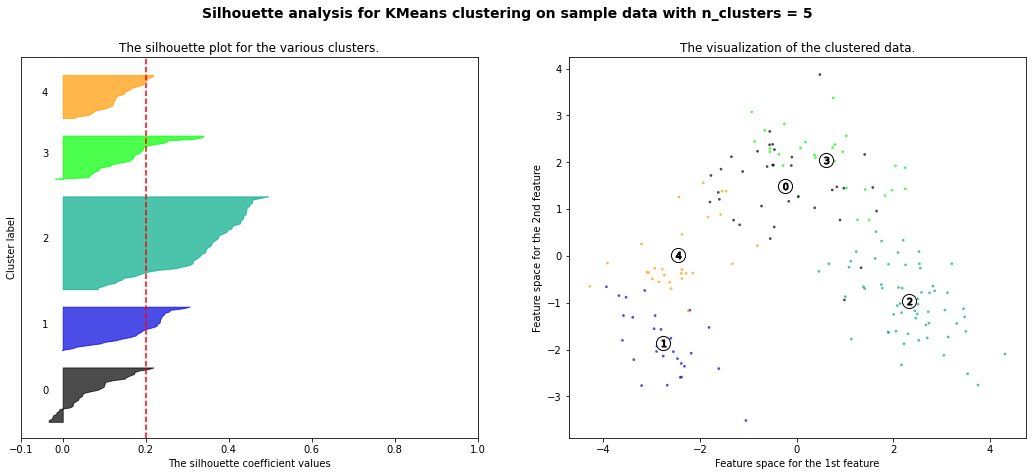

In [46]:
from sklearn.impute import SimpleImputer
X = x_pca
range_n_clusters = range(2,6)

from sklearn.cluster import KMeans
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(x_pca) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(x_pca)
    
    silhouette_avg = silhouette_score(x_pca, cluster_labels)

    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)

KMeans(n_clusters=3)

In [26]:
kmeans.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03, -1.80153234e-02,  3.22512140e-02,
        -2.30035303e-02, -1.39401351e-02, -4.38400536e-03,
        -8.61995490e-03],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02,  2.49642497e-02, -5.02855192e-02,
         7.46793027e-02,  2.12907099e-02,  7.43830113e-03,
         5.06192498e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02, -7.38798948e-03,  2.00269270e-02,
        -6.14683784e-02, -8.11598488e-03, -3.45518279e-03,
        -5.05509102e-02]])

In [59]:
data.shape

(178, 13)

In [60]:
x_pca.shape
x_pca[0]

array([ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
       -0.22388013,  0.59642655,  0.06513909,  0.64144271,  1.02095585,
       -0.4515634 ,  0.54081041, -0.06623863])

In [76]:
labels = df["a"]

df2 = pd.DataFrame(x_pca, columns = ["b","c","d","e","f","g","h","i","j","k","l","m","n"])

def converter(cluster):
    if cluster == 'blue':
        return 0
    elif cluster == 'red':
        return 1
    else:
        return 2
    
df2['Cluster'] = labels.apply(converter)

In [69]:
labels

0        red
1        red
2        red
3        red
4        red
       ...  
173    green
174    green
175    green
176    green
177    green
Name: a, Length: 178, dtype: object

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

#K Means
print("Kmeans results:")
print(confusion_matrix(df2['Cluster'],kmeans.labels_))
print(classification_report(df2['Cluster'],kmeans.labels_))

Kmeans results:
[[65  3  3]
 [ 0 59  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        71
           1       0.95      1.00      0.98        59
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

